In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
from scipy import ndimage

%matplotlib inline

# Find Boundary

In [2]:
filename = "/Volumes/GoogleDrive/My Drive/Alperen's Images/Exp 5 The Best Set/20170616_124815718/images/16062017_125258857_600.jpg"
# a=io.imread(filename,as_grey=True)
a = cv2.imread(filename)

In [3]:
# # Plot the image
# plt.figure(figsize=(12,6))
# plt.imshow(a,cmap=plt.cm.gray)
# plt.show()

# plt.figure(figsize=(12,6))
# plt.imshow(a[0:35,:],cmap=plt.cm.gray)
# plt.show()

# plt.figure(figsize=(12,6))
# plt.imshow(a[35:-20,:],cmap=plt.cm.gray)
# plt.show()

In [4]:
# img = a[35:-20,:]
img = a.copy()
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(imgray.shape)


(480, 640)


(480, 640)


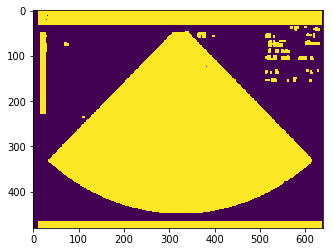

In [5]:

ret,thresh = cv2.threshold(imgray,5,255,0)
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

print(thresh.shape)

plt.imshow(thresh)
plt.show()

# image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
c = max(contours, key=cv2.contourArea)

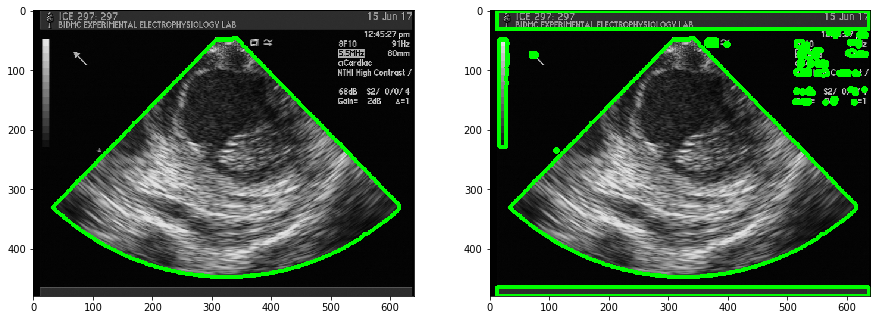

In [6]:
plt.figure(figsize=(15, 6))
plt.subplot(121)
cv2.drawContours(img, c, -1, (0,255,0), 5)
plt.imshow(img)
plt.subplot(122)
cv2.drawContours(img, contours, -1, (0,255,0), 5)
plt.imshow(img)
plt.show()


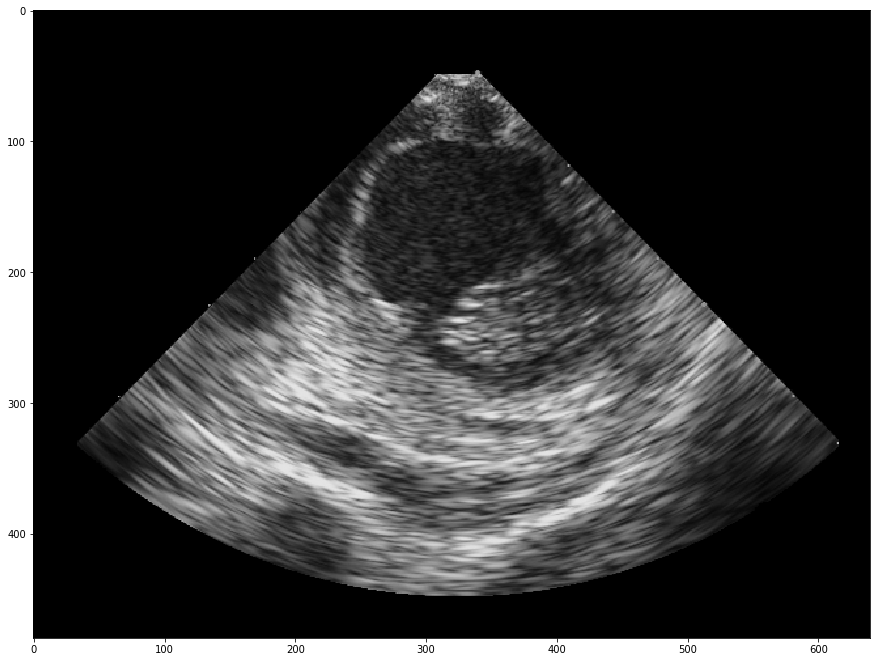

In [7]:
# mask = np.zeros((img.shape[0], img.shape[1], 3))
# for i in c: 
#     mask[i[0][1], i[0][0],:] = np.ones(3)

img = a.copy()
ori = a.copy()
img = cv2.fillPoly(img, pts =[c], color=(255,255,255))
plt.figure(figsize=(15,15))
plt.imshow(a - img)
# plt.imshow(img, cmap = 'Greys')
plt.show()

In [8]:
# ultra_ori_pos = a - img
# ultra = ultra_ori.copy()
ultra_ori = a - img
ultra = ultra_ori.copy()
ultra = cv2.cvtColor(ultra,cv2.COLOR_BGR2GRAY)

(480, 640) 255.0 0.0


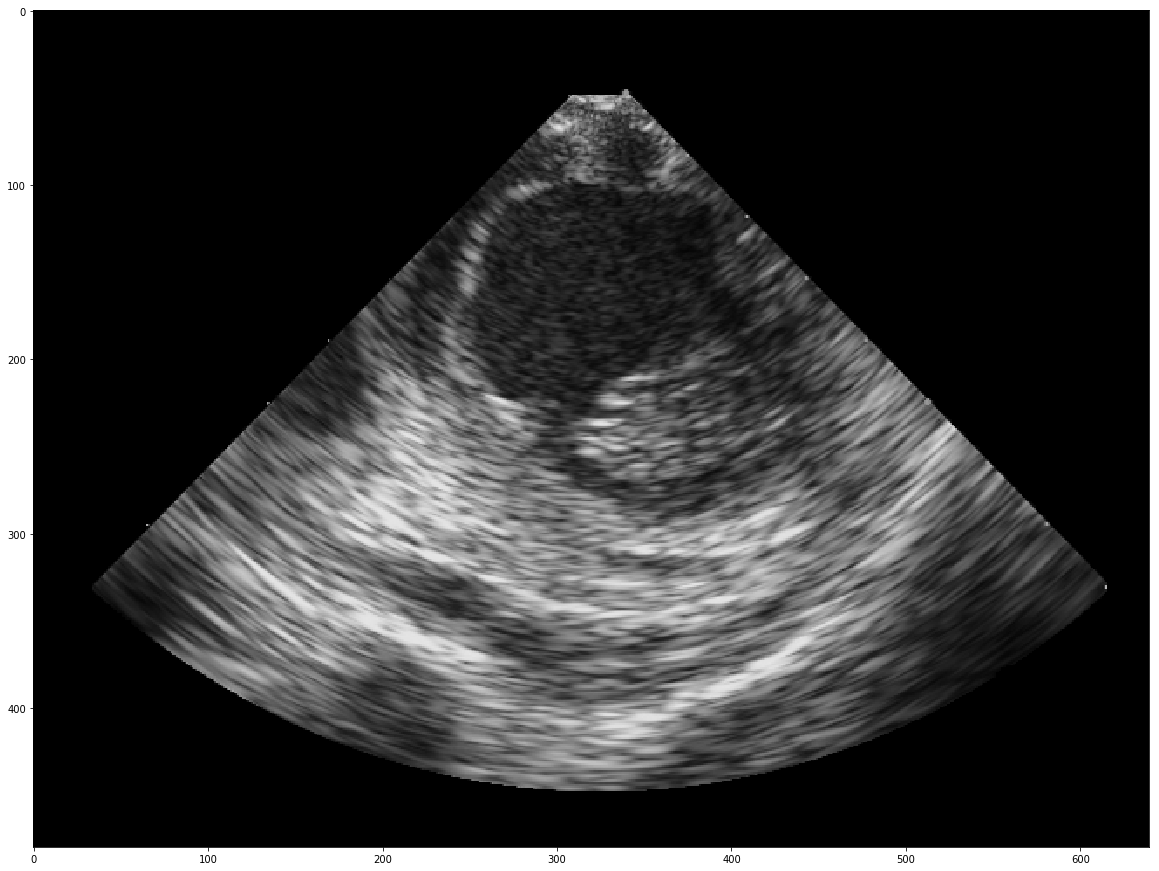

In [9]:
#normalize ultra
ultra = ultra / (ultra.max() - ultra.min())*255
print(ultra.shape, ultra.max(), ultra.min())

plt.figure(figsize=(20, 20))
plt.imshow(ultra_ori, cmap = 'Greys')
plt.show()


# Size of Speckle?

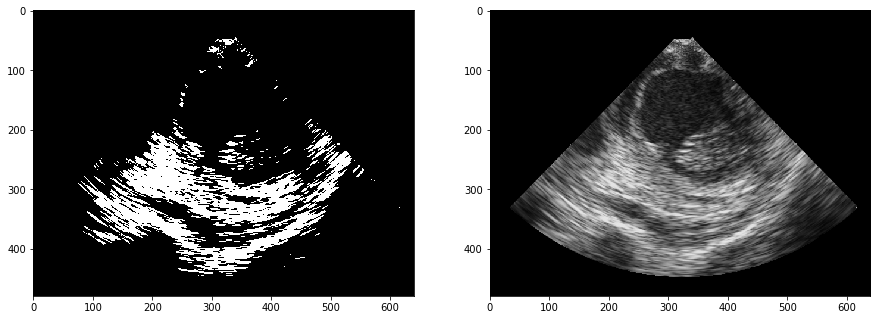

In [10]:
%matplotlib inline
# ultragray = cv2.cvtColor(ultra, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(ultra,140,255,0)

# thresh = cv2.erode(thresh, None, iterations=2)
# thresh = cv2.dilate(thresh, None, iterations=2)

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(thresh, cmap='gist_gray')
plt.subplot(122)
plt.imshow(ultra_ori)
plt.show()

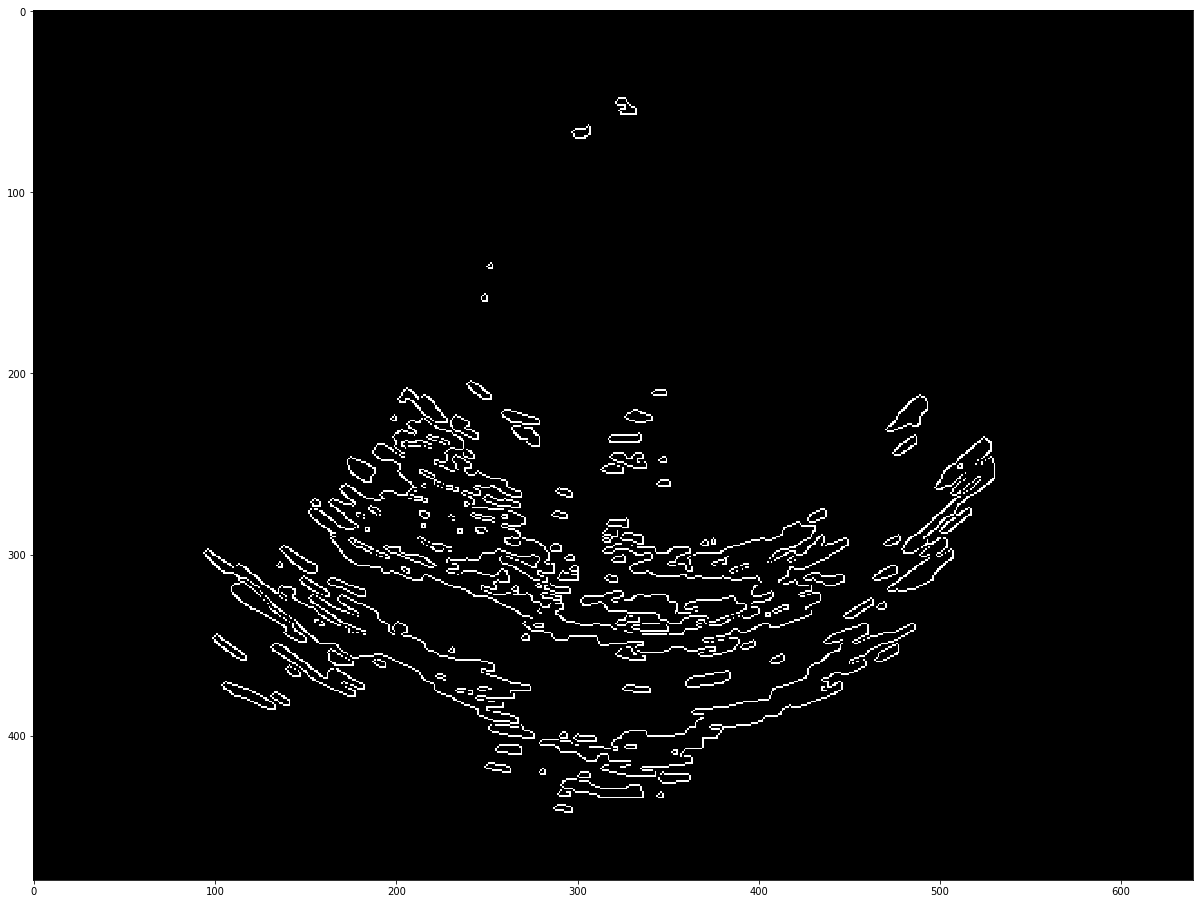

In [11]:

# ret,thresh = cv2.threshold(imgray,5,255,0)
# ret,thresh = cv2.threshold(ultra,140,255,0)
# thresh = cv2.erode(thresh, None, iterations=2)
# thresh = cv2.dilate(thresh, None, iterations=2)

# print(thresh.shape)

# plt.imshow(thresh)
# plt.show()

# # image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
# image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# c = max(contours, key=cv2.contourArea)

# print(ultra_ori.shape)
# print(ultra.shape)


ret,thresh = cv2.threshold(ultra_ori,140,255,0)
thresh = cv2.erode(thresh, None, iterations=1)
thresh = cv2.dilate(thresh, None, iterations=1)

edge_detected_image = cv2.Canny(thresh, 75, 200)
plt.figure(figsize=(25,16))
plt.imshow(edge_detected_image, cmap='gist_gray')
# plt.imshow(thresh)

# plt.imshow(ultra_ori)
# plt.imshow(edge_detected_image)





In [12]:
# for i in np.arange(10, 200, 10):
#     ret,thresh = cv2.threshold(ultra_ori,i,255,0)
#     thresh = cv2.erode(thresh, None, iterations=1)
#     thresh = cv2.dilate(thresh, None, iterations=2)

#     edge_detected_image = cv2.Canny(thresh, 75, 200)
# #     plt.figure()
# #     plt.imshow(edge_detected_image, cmap='gist_gray')
# #     plt.title("i = %i" % i )
# #     plt.show()
    
#     _, contours, _= cv2.findContours(edge_detected_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

#     area = []
#     for c in contours: 
#         a = cv2.contourArea(c)
#         area.append(a)
#     area = np.array(area)
    
#     contours = np.array(contours) 
#     big_contours = contours[(np.where((area >= 20) & (area < 100)))] #(area >= 4) & 
    
#     cp = ultra_ori.copy()
#     plt.figure()
#     cv2.drawContours(cp, big_contours,  -1, (0,255,0), 1)
#     plt.imshow(cp)
#     plt.title("i = %i" % i )
#     plt.show()
    

0.0 212.5 11.225978647686834
32


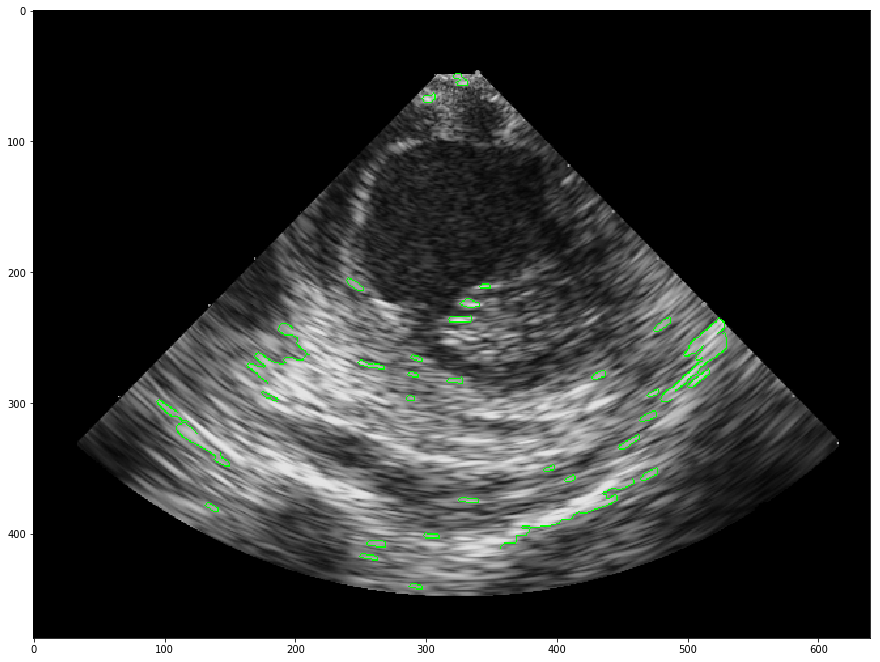

In [14]:
_, contours, _= cv2.findContours(edge_detected_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

area = []
for c in contours: 
    a = cv2.contourArea(c)
    area.append(a)
area = np.array(area)
print(area.min(), area.max(), area.mean())
contours = np.array(contours) 
big_contours = contours[(np.where((area >= 20) & (area < 70)))] #(area >= 4) & 
print(len(big_contours))

cp = ultra_ori.copy()
plt.figure(figsize=(15,15))
cv2.drawContours(cp, big_contours,  -1, (0,255,0), 1)
plt.imshow(cp)
plt.show()